# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import mysql.connector
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

# Loading the Dataset

In [3]:
db=mysql.connector.connect( host="localhost",
                            username="root",
                            password="PASSWORD@629",
                            database="inventory")
cur = db.cursor()

query= """select * from inventory.vendor_sales_summary;"""
cur.execute(query)
data=cur.fetchall()
data
columns = [desc[0] for desc in cur.description]

df=pd.DataFrame(data,columns=columns)
df


,VendorNumber,VendorName,Brand,ActualPricePerProduct,PurPricePerProduct,TotalQuantityPurchased,TotalAmountSpent,Volume,SalesPricePerQuantity,TotalQuantitySold,TotalEarned,TotalExcise,TotalFreight,GrossProfit,ProfitMargin,StockTurnOver,SalesToPurchaseRatio
0,12546,JIM BEAM BRANDS COMPANY,1004,16.49,10.65,650.0,6922.50,750.0,16.49,5.0,82.45,3.94,123880.97,-6840.05,-98.808956,0.0077,0.011910
1,12546,JIM BEAM BRANDS COMPANY,1004,16.49,10.65,650.0,6922.50,750.0,14.49,37.0,536.13,29.14,123880.97,-6386.37,-92.255255,0.0569,0.077447
2,12546,JIM BEAM BRANDS COMPANY,1005,34.99,27.34,247.0,6752.98,375.0,34.99,918.0,32120.82,359.97,123880.97,25367.84,375.654008,3.7166,4.756540
3,2000,SOUTHERN WINE & SPIRITS NE,10058,13.99,9.26,21097.0,195358.22,750.0,14.99,6447.0,96640.53,718.86,18808.83,-98717.69,-50.531629,0.3056,0.494684
4,2000,SOUTHERN WINE & SPIRITS NE,10058,13.99,9.26,21097.0,195358.22,750.0,14.99,6447.0,96640.53,718.86,207.76,-98717.69,-50.531629,0.3056,0.494684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22281,2000,SOUTHERN GLAZERS W&S OF NE,27969,36.99,24.34,168.0,4089.12,750.0,36.99,1.0,36.99,0.11,18808.83,-4052.13,-99.095404,0.0060,0.009046
22282,2000,SOUTHERN GLAZERS W&S OF NE,27969,36.99,24.34,168.0,4089.12,750.0,36.99,1.0,36.99,0.11,207.76,-4052.13,-99.095404,0.0060,0.009046
22283,10754,PERFECTA WINES,20439,13.99,4.68,36.0,168.48,750.0,13.99,1.0,13.99,0.11,28720.52,-154.49,-91.696344,0.0278,0.083037
22284,12331,STELLAR IMPORTING CO LLC,263,17.99,13.95,12.0,167.40,750.0,17.99,2.0,35.98,1.58,119.23,-131.42,-78.506571,0.1667,0.214934


# Exploratory Data Analysis
- <span style="font-size:90%">Previously we examined the various tables of the database to identify key variables, understanding their relationship , and determine which ones should be included in the final table</span>
- <span style="font-size:90%">In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before further analysis</span>


In [4]:
# Summary statistics:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,22286.0,9136.379925,16173.787011,2.000000e+00,3664.000000,4425.000000,9552.000000,2.013590e+05
Brand,22286.0,18622.452975,12926.665223,5.800000e+01,6385.000000,18742.000000,26066.000000,9.063100e+04
ActualPricePerProduct,22286.0,29.678403,94.274496,4.900000e-01,10.990000,15.990000,27.990000,5.799990e+03
PurPricePerProduct,22286.0,19.972679,68.377515,3.600000e-01,6.997500,10.450000,18.490000,4.264700e+03
TotalQuantityPurchased,22286.0,4493.971597,12609.807803,1.000000e+00,86.000000,804.000000,3506.000000,3.376600e+05
TotalAmountSpent,22286.0,48558.033029,173538.625094,7.100000e-01,1351.105000,9711.900000,37456.292500,3.811252e+06
Volume,22286.0,858.172440,565.204188,5.000000e+01,750.000000,750.000000,750.000000,2.000000e+04
SalesPricePerQuantity,22286.0,29.559151,94.173464,0.000000e+00,10.990000,15.990000,26.990000,5.799990e+03
TotalQuantitySold,22286.0,1617.599794,6511.646728,1.000000e+00,37.000000,222.000000,1043.000000,3.349390e+05
TotalEarned,22286.0,22443.317608,79864.912647,0.000000e+00,875.422500,4377.285000,16873.877500,2.857178e+06


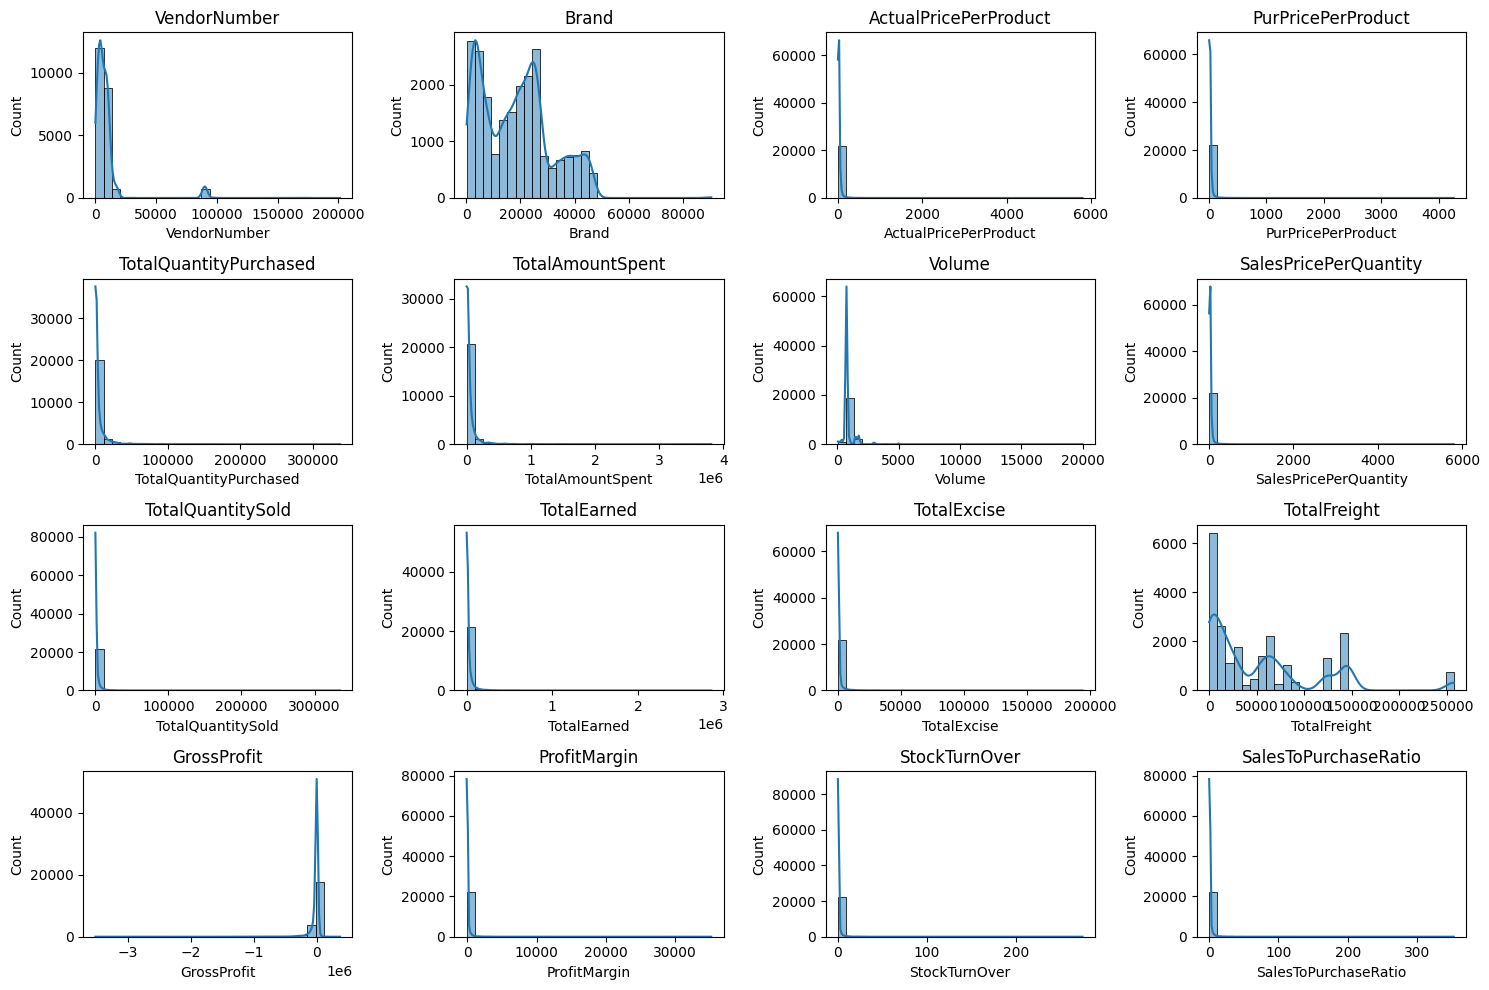

In [5]:
# Distribution of numerical columns:

numerical_cols=df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

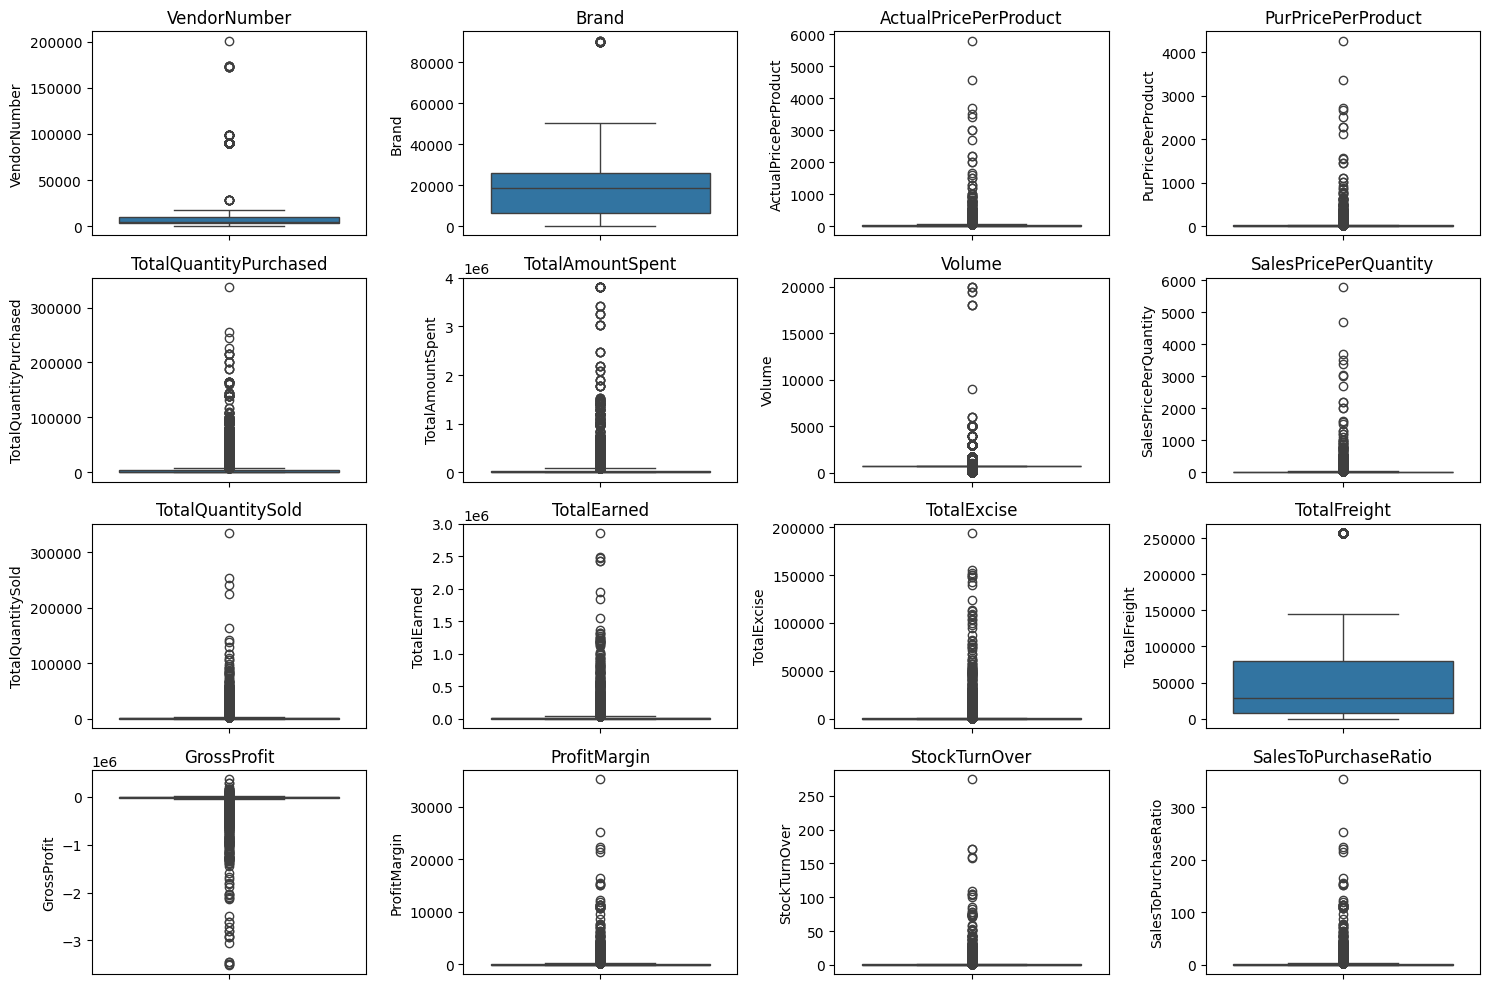

In [5]:
# Distribution of numerical columns:

numerical_cols=df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

# Summary Statistics Insights:
<span style="font-size:90%">Negative And Zero Values:</span>
- <span style="font-size:90%">Gross Profit minimum value is -3.5*10pow(6), Indicating losses or transactions may be selling at loss due to high costs or selling at discounts lower than the purchase price</span>
- <span style="font-size:90%">Total sales quantity and sales dollars are 0 for some products, meaning some products but never sold. These could be slow moving or obsolete stocks.</span>


<span style="font-size:90%">Outliers indicated by high standard deviations:</span>
- <span style="font-size:90%">Purchase price and actual price: The max values are significantly higher than the mean. Thus, indicating potantial premium products.</span>
- <span style="font-size:90%">Freight costs: Huge variation from 0.09  to 257032.Suggests logistics inefficiency or bulk shipments.</span>
- <span style="font-size:90%">Stock Turnover: Ranges from 0.0001 to 274.5, implying some products sell very fast while some remain in stock indefinitely. Value more than 1 indicates that the sold quantity for that product is greater than the quantity purchased due to either sales are being fulfilled from older stocks.</span>    

In [6]:
# Let's filter out the data by removing the inconsistencies:
import mysql.connector
import pandas as pd
db=mysql.connector.connect( host="localhost",
                            username="root",
                            password="PASSWORD@629",
                            database="inventory")
cur = db.cursor()

query= """SELECT * FROM vendor_sales_summary
WHERE GrossProfit>0

AND ProfitMargin>0

AND TotalQuantitySold>0;"""
cur.execute(query)
columns = [desc[0] for desc in cur.description]
data=cur.fetchall()
df=pd.DataFrame(data,columns=columns)
df

,VendorNumber,VendorName,Brand,ActualPricePerProduct,PurPricePerProduct,TotalQuantityPurchased,TotalAmountSpent,Volume,SalesPricePerQuantity,TotalQuantitySold,TotalEarned,TotalExcise,TotalFreight,GrossProfit,ProfitMargin,StockTurnOver,SalesToPurchaseRatio
0,12546,JIM BEAM BRANDS COMPANY,1005,34.99,27.34,247.0,6752.98,375.0,34.99,918.0,32120.82,359.97,123880.97,25367.84,375.654008,3.7166,4.756540
1,12546,JIM BEAM BRANDS COMPANY,1006,3.99,3.14,89.0,279.46,50.0,3.99,328.0,1308.72,17.03,123880.97,1029.26,368.303156,3.6854,4.683032
2,10754,PERFECTA WINES,10062,8.99,6.03,2148.0,12952.44,750.0,8.99,1890.0,16991.10,209.71,28720.52,4038.66,31.180689,0.8799,1.311807
3,8352,LUXCO INC,1009,49.99,38.75,37.0,1433.75,750.0,49.99,127.0,6348.73,100.11,10261.60,4914.98,342.805929,3.4324,4.428059
4,17035,PERNOD RICARD USA,1013,13.99,10.29,331.0,3405.99,750.0,18.99,208.0,3949.92,164.03,123780.22,543.93,15.969806,0.6284,1.159698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7715,7153,PINE STATE TRADING CO,14761,36.99,24.02,12.0,288.24,750.0,36.99,9.0,332.91,1.01,15884.82,44.67,15.497502,0.7500,1.154975
7716,1590,DIAGEO CHATEAU ESTATE WINES,22046,11.99,7.99,12.0,95.88,750.0,11.99,12.0,143.88,1.35,7259.75,48.00,50.062578,1.0000,1.500626
7717,9165,ULTRA BEVERAGE COMPANY LLP,5485,29.99,21.42,4.0,85.68,750.0,29.99,4.0,119.96,3.15,68054.70,34.28,40.009337,1.0000,1.400093
7718,90047,CRUSH WINES,15775,14.49,9.35,12.0,112.20,1000.0,14.49,12.0,173.88,1.80,1457.73,61.68,54.973262,1.0000,1.549733


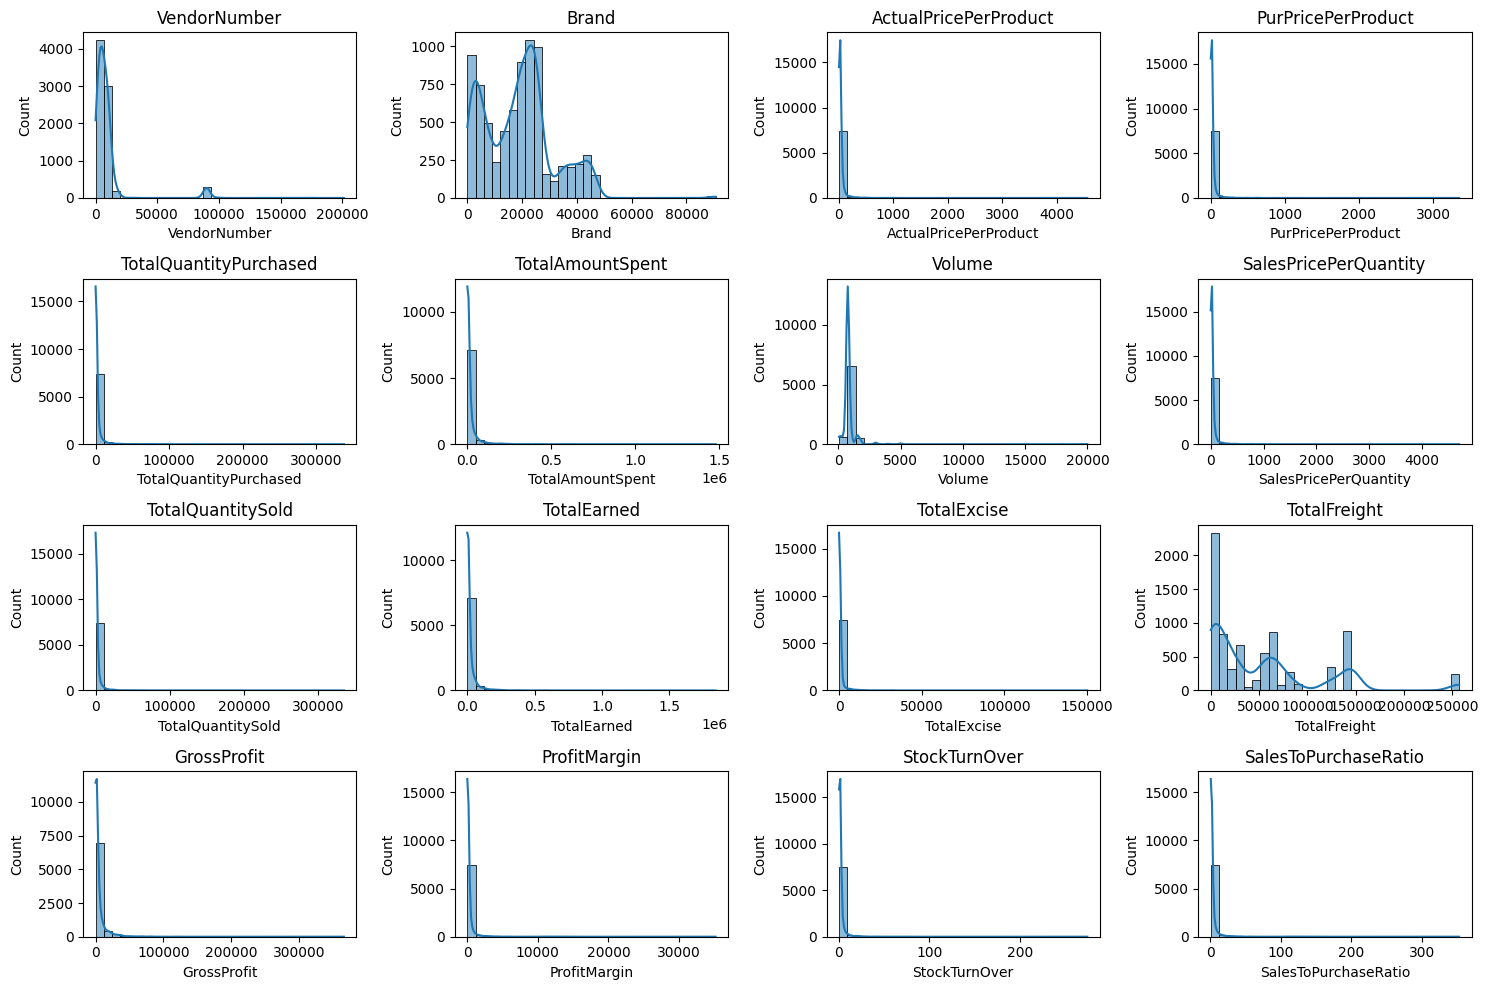

In [7]:
# Distribution of numerical columns after cleaning data:

numerical_cols=df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,7720.0,9475.159326,17141.877738,2.000000e+00,3950.000000,4425.000000,9552.000000,2.013590e+05
Brand,7720.0,18947.059326,12597.413805,5.800000e+01,7770.000000,19635.500000,25205.250000,9.063100e+04
ActualPricePerProduct,7720.0,36.363990,118.926430,4.900000e-01,9.990000,15.990000,28.990000,4.559990e+03
PurPricePerProduct,7720.0,24.343764,84.678111,3.600000e-01,6.660000,10.270000,19.300000,3.352930e+03
TotalQuantityPurchased,7720.0,2321.891321,9947.687041,1.000000e+00,24.000000,142.000000,1189.000000,3.376600e+05
TotalAmountSpent,7720.0,16289.566034,55536.932167,7.100000e-01,335.880000,1880.880000,11482.330000,1.478001e+06
Volume,7720.0,838.411075,754.075319,5.000000e+01,750.000000,750.000000,750.000000,2.000000e+04
SalesPricePerQuantity,7720.0,35.789852,118.003402,4.900000e-01,9.990000,14.990000,27.990000,4.696990e+03
TotalQuantitySold,7720.0,2114.456218,9492.748396,1.000000e+00,36.000000,173.500000,1082.000000,3.349390e+05
TotalEarned,7720.0,20979.137712,64971.700505,1.980000e+00,867.272500,3795.250000,15628.890000,1.843815e+06


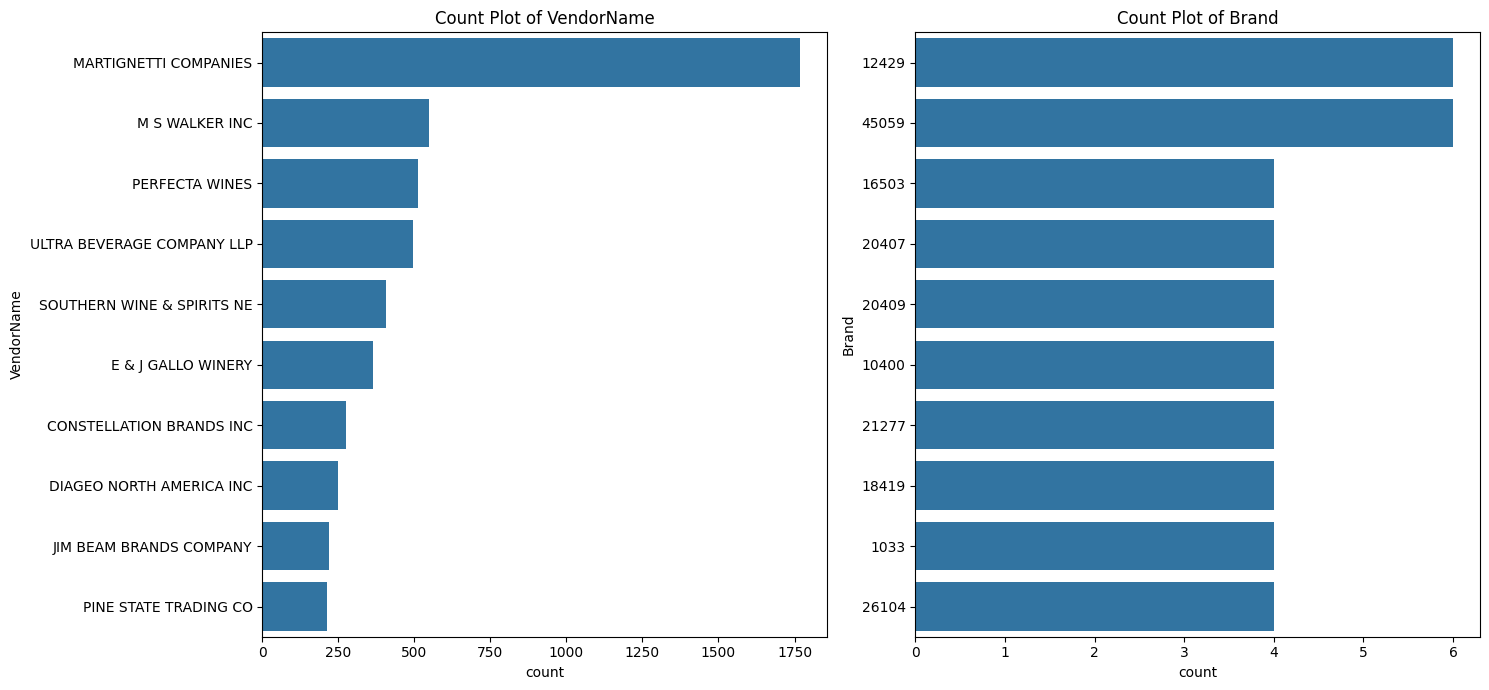

In [9]:
# Categorical Columns count plot:
categorical_cols = ["VendorName","Brand"]
plt.figure(figsize=(15,7))
for i, col in enumerate(categorical_cols):

    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) #Top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()


# Relation between the numerical columns:

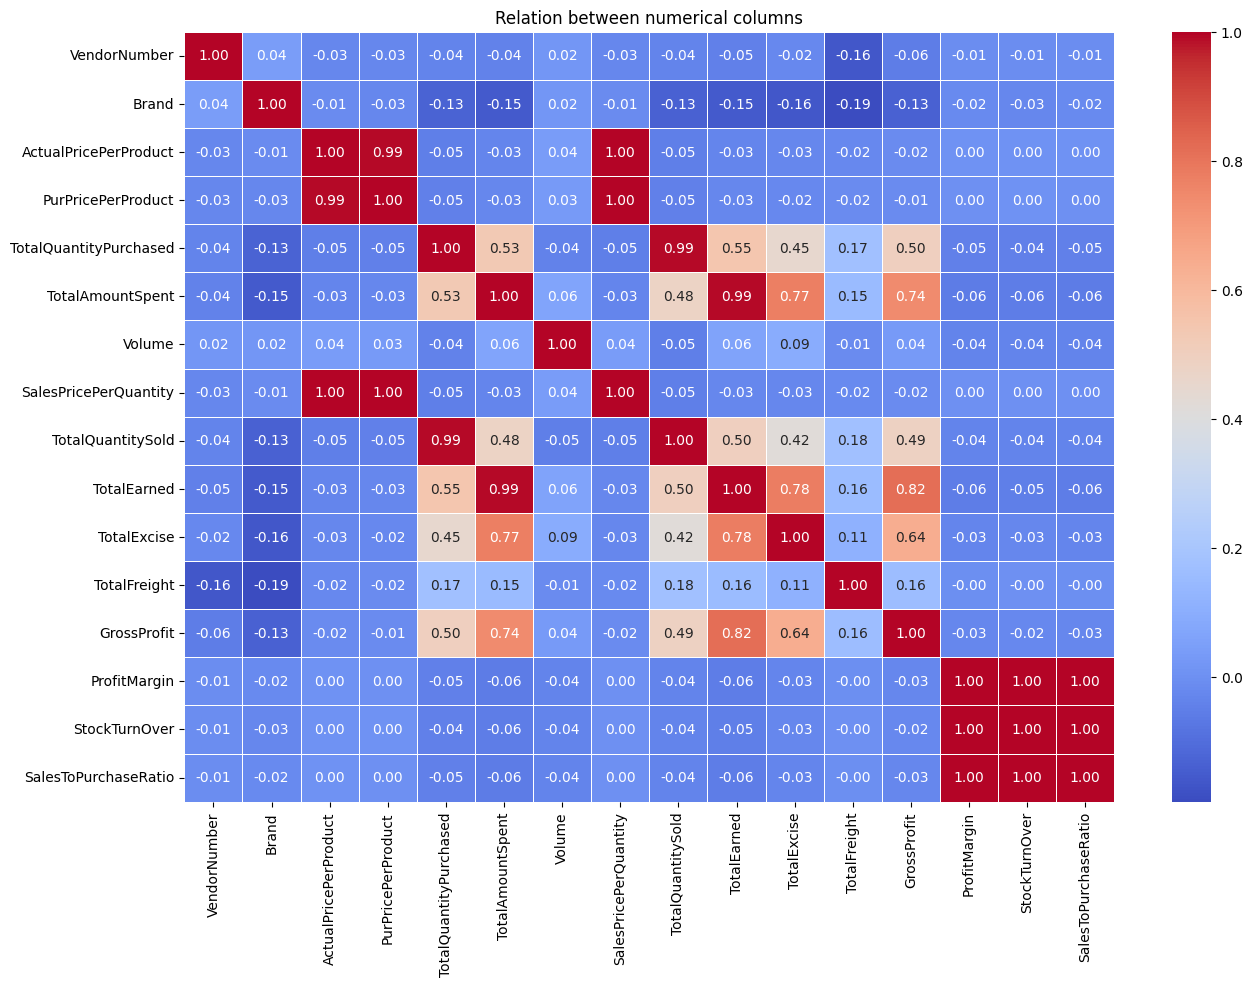

In [10]:
# Correlation Heatmap is the best way to show the relation between two numeric columns:

plt.figure(figsize=(15,10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm',linewidths=0.5)
plt.title("Relation between numerical columns")
plt.show()

# Correlation Insights:
- <span style="font-size:95%">PurchasePrice has weak correlation with TotalEarned and GrossProfit, Suggesting that price variations donot significantly impact sales revenue or profit </span>
- <span style="font-size:95%">Strong correlation between TotalQuantityPurchased and TotalQuantitySold confirming efficient inventory turnover</span>
- <span style="font-size:95%">Negative correlation between profit margin & total sales price suggests that as sales price increases, margins decreases , possibly due to competitive pricing pressures</span>
- <span style="font-size:95%">StockTurnover has negative weak correlation with GrossProfit and ProfitMargin, indicating that faster turnovers does not necessarily result in higher profitability.</span>

# Identify the brands that need promotional or pricing adjustments which exhibit lower sales performance but higher profit margins

In [11]:
brand_performance = df.groupby('Brand').agg({'TotalEarned' : 'sum',
                                             'ProfitMargin' :'mean'}).reset_index()
low_sales_threshold= brand_performance['TotalEarned'].quantile(0.15) 
# Value of Total Earned below which 15% of the brands lie
high_profitMargin_threshold= brand_performance['ProfitMargin'].quantile(0.85)
#Value of ProfitMargin below which 85% of the total brands lie
brand_performance

,Brand,TotalEarned,ProfitMargin
0,58,35527.65,7.842551
1,61,4364.88,31.981132
2,70,349.86,79.011461
3,75,314.79,187.742230
4,82,24749.34,453.661647
...,...,...,...
6391,90088,3509.74,532.659168
6392,90089,19078.41,665.144138
6393,90090,9749.85,262.499163
6394,90609,1474.41,8573.000000


In [13]:
low_sales_threshold

np.float64(431.64)

In [14]:
high_profitMargin_threshold

np.float64(230.4689963481889)

In [15]:
target_brands=brand_performance[
              (brand_performance['TotalEarned']<=low_sales_threshold) &
              (brand_performance['ProfitMargin']>=high_profitMargin_threshold)
                     ]
print("Brands with low sales but high profit margin")
display(target_brands.sort_values("TotalEarned"))

Brands with low sales but high profit margin


,Brand,TotalEarned,ProfitMargin
704,2626,27.86,880.985915
1559,6064,27.96,460.320641
1495,5654,35.97,277.836134
3905,21691,44.94,769.245648
1400,5224,47.45,570.197740
...,...,...,...
1857,8151,410.85,7133.274648
540,2027,411.82,311.984794
5995,41417,415.74,233.766859
2984,17911,419.30,497.208375


In [16]:
brand_performance=brand_performance[brand_performance["TotalEarned"]<800]

# Scatter Plot Insight
- <span style="font-size:95%">It can be seen that the brands which have earned less than around 400$ to the vendor and which have a profit margin greater than around 240, need promotional and pricing adjustments</span>


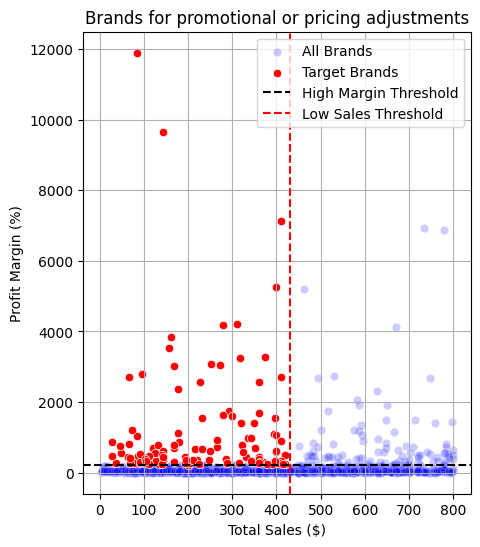

In [17]:
plt.figure(figsize=(5,6))
sns.scatterplot(data=brand_performance,x='TotalEarned',y='ProfitMargin',color='blue',label='All Brands',alpha=0.2)
sns.scatterplot(data=target_brands,x='TotalEarned',y='ProfitMargin',color='red',label='Target Brands')
plt.axhline(high_profitMargin_threshold,linestyle='--',color='black',label='High Margin Threshold')
plt.axvline(low_sales_threshold,linestyle='--',color='red',label='Low Sales Threshold')
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for promotional or pricing adjustments")
plt.legend()
plt.grid(True)
plt.show()



# Vendors and Brands With highest sales performance

In [18]:
def format_dollars(value):
    if value >=1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >=1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)


In [19]:
top_vendors=df.groupby("VendorName")["TotalEarned"].sum().reset_index().nlargest(10, "TotalEarned")
top_brands=df.groupby("Brand")["TotalEarned"].sum().reset_index().nlargest(10, "TotalEarned")
display(top_vendors)
display(top_brands)


,VendorName,TotalEarned
57,MARTIGNETTI COMPANIES,26914416.26
25,DIAGEO NORTH AMERICA INC,19936854.15
46,JIM BEAM BRANDS COMPANY,9371071.64
30,E & J GALLO WINERY,9069167.64
20,CONSTELLATION BRANDS INC,8278742.67
68,PERNOD RICARD USA,8147211.91
6,BACARDI USA INC,7079081.85
106,ULTRA BEVERAGE COMPANY LLP,6358237.23
53,M S WALKER INC,6335293.11
79,SAZERAC CO INC,6315314.75


,Brand,TotalEarned
980,3505,2498514.30
714,2663,1843815.19
847,3040,1416801.42
1109,3857,1299590.03
1929,8512,1193542.93
1102,3826,1126056.69
398,1232,848422.96
1119,3893,816412.77
579,2127,797712.05
988,3522,773372.64


In [20]:
top_brands["TotalEarned"].apply(lambda x: format_dollars(x))


980       2.50M
714       1.84M
847       1.42M
1109      1.30M
1929      1.19M
1102      1.13M
398     848.42K
1119    816.41K
579     797.71K
988     773.37K
Name: TotalEarned, dtype: object

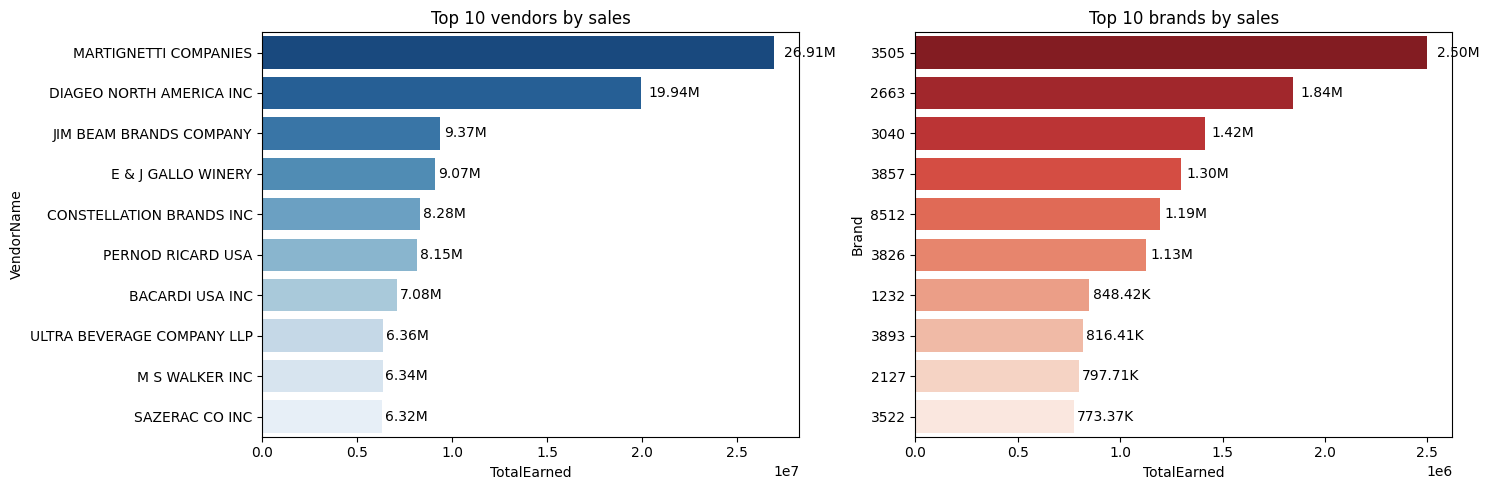

In [21]:
plt.figure(figsize=(15,5))

#plot for top vendors
plt.subplot(1,2,1)
ax1 = sns.barplot( y=top_vendors["VendorName"], 
    x=top_vendors["TotalEarned"] ,palette="Blues_r")
plt.title("Top 10 vendors by sales")
for bar in ax1.patches:
    ax1.text(bar.get_width()+(bar.get_width()*0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left',va='center',fontsize=10,color='black')

#plot for top brands
plt.subplot(1,2,2)
ax2 = sns.barplot(y=top_brands["Brand"].astype(str),x=top_brands["TotalEarned"],palette="Reds_r")
plt.title("Top 10 brands by sales")
for bar in ax2.patches:
    ax2.text(bar.get_width()+(bar.get_width()*0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left',va='center',fontsize=10,color='black')
plt.tight_layout()
plt.show()

#  Vendors Contributing The Most To total Purchases

In [22]:
Vendor_performance=df.groupby("VendorName").agg({
    'TotalEarned':'sum',
    'GrossProfit':'sum',
    'TotalAmountSpent':'sum',
}).reset_index()

Vendor_performance

,VendorName,TotalEarned,GrossProfit,TotalAmountSpent
0,ADAMBA IMPORTS INTL INC,704.53,258.37,446.16
1,ALISA CARR BEVERAGES,104470.94,78772.82,25698.12
2,ALTAMAR BRANDS LLC,15706.81,4000.61,11706.20
3,AMERICAN SPIRITS EXCHANGE,1511.16,577.08,934.08
4,AMERICAN VINTAGE BEVERAGE,139603.53,35167.85,104435.68
...,...,...,...,...
114,WEIN BAUER INC,6130.65,2088.49,4042.16
115,WESTERN SPIRITS BEVERAGE CO,73929.40,18217.73,55711.67
116,WILLIAM GRANT & SONS INC,1608665.96,214716.46,1393949.50
117,WINE GROUP INC,2863491.13,446377.61,2417113.52


In [23]:
Vendor_performance['PurchaseContribution%']=(Vendor_performance['TotalAmountSpent']/Vendor_performance['TotalAmountSpent'].sum())*100
Vendor_performance=round(Vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)
Vendor_performance

,VendorName,TotalEarned,GrossProfit,TotalAmountSpent,PurchaseContribution%
57,MARTIGNETTI COMPANIES,26914416.26,7360527.44,19553888.82,15.55
25,DIAGEO NORTH AMERICA INC,19936854.15,4038795.35,15898058.80,12.64
46,JIM BEAM BRANDS COMPANY,9371071.64,1513275.43,7857796.21,6.25
68,PERNOD RICARD USA,8147211.91,1338496.63,6808715.28,5.41
30,E & J GALLO WINERY,9069167.64,2305311.58,6763856.06,5.38
...,...,...,...,...,...
56,MARSALLE COMPANY,2500.61,2421.83,78.78,0.00
85,SILVER MOUNTAIN CIDERS,342.51,265.33,77.18,0.00
16,CAPSTONE INTERNATIONAL,246.87,192.23,54.64,0.00
27,DJINN SPIRITS LLC,36.99,8.65,28.34,0.00


In [24]:
most_purchasing_vendors=Vendor_performance.head(10)
most_purchasing_vendors['TotalEarned']=most_purchasing_vendors['TotalEarned'].apply(format_dollars)
most_purchasing_vendors['GrossProfit']=most_purchasing_vendors['GrossProfit'].apply(format_dollars)
most_purchasing_vendors['TotalAmountSpent']=most_purchasing_vendors['TotalAmountSpent'].apply(format_dollars)
most_purchasing_vendors

,VendorName,TotalEarned,GrossProfit,TotalAmountSpent,PurchaseContribution%
57,MARTIGNETTI COMPANIES,26.91M,7.36M,19.55M,15.55
25,DIAGEO NORTH AMERICA INC,19.94M,4.04M,15.90M,12.64
46,JIM BEAM BRANDS COMPANY,9.37M,1.51M,7.86M,6.25
68,PERNOD RICARD USA,8.15M,1.34M,6.81M,5.41
30,E & J GALLO WINERY,9.07M,2.31M,6.76M,5.38
20,CONSTELLATION BRANDS INC,8.28M,1.65M,6.63M,5.27
6,BACARDI USA INC,7.08M,1.33M,5.75M,4.57
79,SAZERAC CO INC,6.32M,1.24M,5.07M,4.03
53,M S WALKER INC,6.34M,1.68M,4.65M,3.70
106,ULTRA BEVERAGE COMPANY LLP,6.36M,1.87M,4.49M,3.57


In [25]:
most_purchasing_vendors['PurchaseContribution%'].sum()

np.float64(66.37)

In [26]:
most_purchasing_vendors['CumulativeContribution%']=most_purchasing_vendors['PurchaseContribution%'].cumsum()
most_purchasing_vendors

,VendorName,TotalEarned,GrossProfit,TotalAmountSpent,PurchaseContribution%,CumulativeContribution%
57,MARTIGNETTI COMPANIES,26.91M,7.36M,19.55M,15.55,15.55
25,DIAGEO NORTH AMERICA INC,19.94M,4.04M,15.90M,12.64,28.19
46,JIM BEAM BRANDS COMPANY,9.37M,1.51M,7.86M,6.25,34.44
68,PERNOD RICARD USA,8.15M,1.34M,6.81M,5.41,39.85
30,E & J GALLO WINERY,9.07M,2.31M,6.76M,5.38,45.23
20,CONSTELLATION BRANDS INC,8.28M,1.65M,6.63M,5.27,50.50
6,BACARDI USA INC,7.08M,1.33M,5.75M,4.57,55.07
79,SAZERAC CO INC,6.32M,1.24M,5.07M,4.03,59.10
53,M S WALKER INC,6.34M,1.68M,4.65M,3.70,62.80
106,ULTRA BEVERAGE COMPANY LLP,6.36M,1.87M,4.49M,3.57,66.37


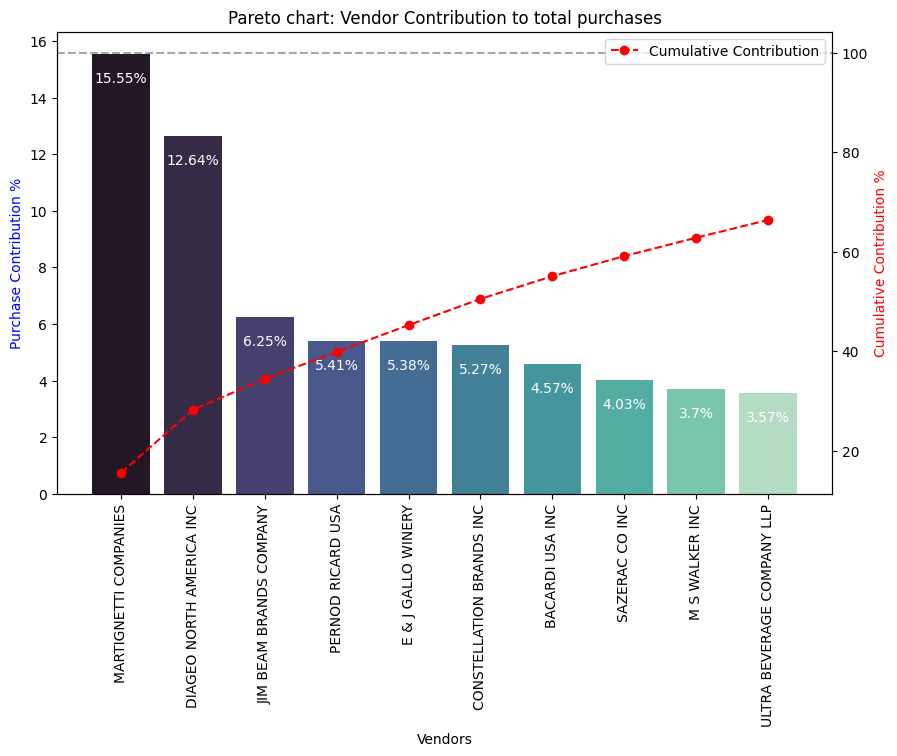

In [27]:
fig, ax1=plt.subplots(figsize=(10,6))
# Barplot for purchase contribution:

sns.barplot(x=most_purchasing_vendors["VendorName"],y=most_purchasing_vendors["PurchaseContribution%"],palette='mako',ax=ax1)
for i,value in enumerate(most_purchasing_vendors["PurchaseContribution%"]):
    ax1.text(i,value-1,str(value)+'%',ha='center',fontsize=10,color='white')
    
#Line plot for Cumulative Contribution:
ax2=ax1.twinx()
ax2.plot(most_purchasing_vendors["VendorName"],most_purchasing_vendors["CumulativeContribution%"],color='red',marker='o',linestyle='dashed',label='Cumulative Contribution')
ax1.set_xticklabels(most_purchasing_vendors["VendorName"],rotation=90)
ax1.set_ylabel("Purchase Contribution %",color='blue')    
ax2.set_ylabel("Cumulative Contribution %",color='red') 
ax1.set_xlabel("Vendors")
ax1.set_title("Pareto chart: Vendor Contribution to total purchases")
ax2.axhline(y=100,color='grey',linestyle='dashed',alpha=0.7)
ax2.legend(loc='upper right')
plt.show()


# Pareto Plot Insight:
- <span style="font-size:95%">Thus, the top 10 most_purchasing_vendors contribute more than 50% of the total purchases.</span>


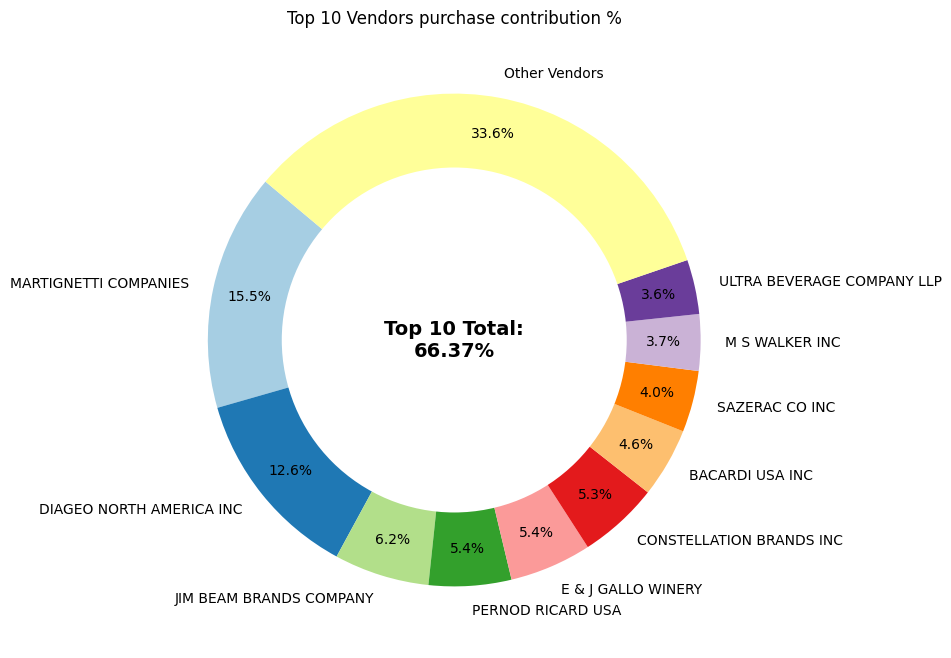

In [28]:
vendors=list(most_purchasing_vendors["VendorName"].values)
purchase_contributions=list(most_purchasing_vendors["PurchaseContribution%"].values)
total_contribution=sum(purchase_contributions)
remaining_contribution=100-total_contribution

# Append Other Vendors as a new element in the list
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

#Donut Chart, first create a pe chart and then create a white circle to make donut effect
fig,ax=plt.subplots(figsize=(8,8))
wedges,texts,autotexts = ax.pie(purchase_contributions,labels=vendors,autopct='%1.1f%%',
                               startangle=140,pctdistance=0.85,colors=plt.cm.Paired.colors)

centre_circle=plt.Circle((0,0),0.70,fc='white')
ax.add_artist(centre_circle)
plt.text(0,0,f'Top 10 Total:\n{total_contribution:.2f}%',fontsize=14,fontweight='bold',ha='center',va='center')
plt.title('Top 10 Vendors purchase contribution %')
plt.show()


# Does purchasing in bulk reduce the unit price and what is the optimal purchase volume for cost saving

In [29]:
df['UnitPurchasePrice']=df['TotalAmountSpent']/df['TotalQuantityPurchased']


In [30]:
df['OrderSize']=pd.qcut(df['TotalQuantityPurchased'],q=3,labels=['Small','Medium','Large'])


In [31]:
MeanUnitPrice=df.groupby('OrderSize')['UnitPurchasePrice'].mean()
display(MeanUnitPrice)


OrderSize
Small     47.449448
Medium    15.531296
Large      9.846656
Name: UnitPurchasePrice, dtype: float64

- <span style="font-size:95%">Vendors buying in bulk (Large Order Size) get the lowest unit price($9.84 per unit) meaning higher margins if they can manage inventory efficiently. </span>
- <span style="font-size:95%">The price difference between small and large orders is substantial (~79.2% reduction in unit cost)</span>
- <span style="font-size:95%">This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes</span>



# Which vendor have low iventory turnover, indicating excess stock and slow moving products?

In [32]:
df.groupby('VendorName')['StockTurnOver'].mean()
# If we want to see the StockTurnOver of each vendor then we need to write the above code 
df[df['StockTurnOver'] < 1].groupby('VendorName')['StockTurnOver'].mean()
# If we want to filter out first then we need to write the above code
# StockTurnOver>1 means vendors have excess stock(might be old stocks) as well as they are able to move them properly
# StockTurnOver<1 means they have excess stock but they are not able to sell them properly

VendorName
ALISA CARR BEVERAGES           0.615400
ALTAMAR BRANDS LLC             0.959400
AMERICAN SPIRITS EXCHANGE      0.875000
AMERICAN VINTAGE BEVERAGE      0.962800
ATLANTIC IMPORTING COMPANY     0.645200
                                 ...   
WEIN BAUER INC                 0.833300
WESTERN SPIRITS BEVERAGE CO    0.804667
WILLIAM GRANT & SONS INC       0.844079
WINE GROUP INC                 0.798171
ZORVINO VINEYARDS              0.912750
Name: StockTurnOver, Length: 102, dtype: float64

# Top 20 Lowest Performing Vendors

In [33]:
df[df['StockTurnOver'] < 1].groupby('VendorName')['StockTurnOver'].mean().sort_values(ascending=True).head(20)


VendorName
ALISA CARR BEVERAGES           0.615400
ATLANTIC IMPORTING COMPANY     0.645200
SURVILLE ENTERPRISES CORP      0.657471
TY KU LLC                      0.705150
HIGHLAND WINE MERCHANTS LLC    0.708300
LATITUDE BEVERAGE COMPANY      0.730773
Circa Wines                    0.745133
FORTUNE WINE BROKERS LLC       0.746620
CRUSH WINES                    0.763927
Dunn Wine Brokers              0.766038
CENTEUR IMPORTS LLC            0.768350
STE MICHELLE WINE ESTATES      0.771677
FREDERICK WILDMAN & SONS       0.781697
SMOKY QUARTZ DISTILLERY LLC    0.783800
PINE STATE TRADING CO          0.784232
SOUTHERN WINE & SPIRITS NE     0.785333
THE IMPORTED GRAPE LLC         0.793708
KOBRAND CORPORATION            0.794588
VINILANDIA USA                 0.795492
TAMWORTH DISTILLING            0.797100
Name: StockTurnOver, dtype: float64

# How much capital in unsold inventory is locked per vendor and which vendors contribute the most to it?

In [34]:
df['TotalUnsoldItems']=df['TotalQuantityPurchased']-df['TotalQuantitySold']

In [35]:
df['TotalAmountLocked'] = np.where(
    df['TotalUnsoldItems'] > 0,
    df['TotalUnsoldItems'] * df['PurPricePerProduct'],
    0
)



In [36]:
TotalLockedCapital = df.groupby("VendorName").agg(
    NetUnsoldItems = ('TotalUnsoldItems', 'sum'),
    LockedCapital  = ('TotalAmountLocked', 'sum')
).reset_index()

VendorsLockedCapital = TotalLockedCapital.sort_values(by="LockedCapital", ascending=False)
VendorsLockedCapital['LockedCapital']=VendorsLockedCapital['LockedCapital'].apply(format_dollars)
VendorsLockedCapital

,VendorName,NetUnsoldItems,LockedCapital
57,MARTIGNETTI COMPANIES,266758.0,3.10M
25,DIAGEO NORTH AMERICA INC,95344.0,1.49M
20,CONSTELLATION BRANDS INC,189429.0,1.34M
46,JIM BEAM BRANDS COMPANY,107596.0,1.11M
68,PERNOD RICARD USA,63910.0,964.94K
...,...,...,...
66,PARK STREET IMPORTS LLC,-44.0,0.0
97,Serralles Usa LLC,-696.0,0.0
89,STAR INDUSTRIES INC.,-223.0,0.0
107,UNCORKED,0.0,0.0


In [37]:
vendor_df = df[df['VendorName'] == 'ALISA CARR BEVERAGES']
display(vendor_df[['VendorName','TotalUnsoldItems','TotalAmountLocked']])


,VendorName,TotalUnsoldItems,TotalAmountLocked
3857,ALISA CARR BEVERAGES,-38.0,0.0
3858,ALISA CARR BEVERAGES,-64.0,0.0
3859,ALISA CARR BEVERAGES,-21.0,0.0
4093,ALISA CARR BEVERAGES,-100.0,0.0
4094,ALISA CARR BEVERAGES,-127.0,0.0
4304,ALISA CARR BEVERAGES,-46.0,0.0
4305,ALISA CARR BEVERAGES,-22.0,0.0
4973,ALISA CARR BEVERAGES,-123.0,0.0
4974,ALISA CARR BEVERAGES,-26.0,0.0
5558,ALISA CARR BEVERAGES,-9.0,0.0


# Problem Statement Insight
- <span style="font-size:95%">Even if the overall TotalUnsoldItems of a vendor is negative, this doesn't mean that the vendor doesn't have any amount stuck. This is because, in a larger frame if we study the analysis of every brand for that vendor, then even a single product with TotalUnsoldItems greater than zero can contribute to TotalAmountLocked. An example of this is the vendor named 'ALISA CARR BEVERAGES' </span>



# What is the 95% confidence intervals for profit margins of  top performing and low performing vendors

In [38]:
top_threshold=df['TotalEarned'].quantile(0.75)
low_threshold=df['TotalEarned'].quantile(0.25)                                         

In [39]:
top_vendors=df[df['TotalEarned']>=top_threshold].dropna()
low_vendors=df[df['TotalEarned']<=low_threshold].dropna()

In [40]:
def confidence_interval(data,confidence=0.95):
                  mean_value=np.mean(data)
                  std_err=np.std(data,ddof=1)/np.sqrt(len(data))
                  t_critical=stats.t.ppf((1+confidence)/2,df=len(data)-1)
                  margin_of_error=t_critical*std_err
                  return mean_value,mean_value-margin_of_error,mean_value+margin_of_error

Top vendors 95% CI:(44.16,55.30),Mean:49.73
Low vendors 95% CI:(177.44,233.53),Mean:205.49


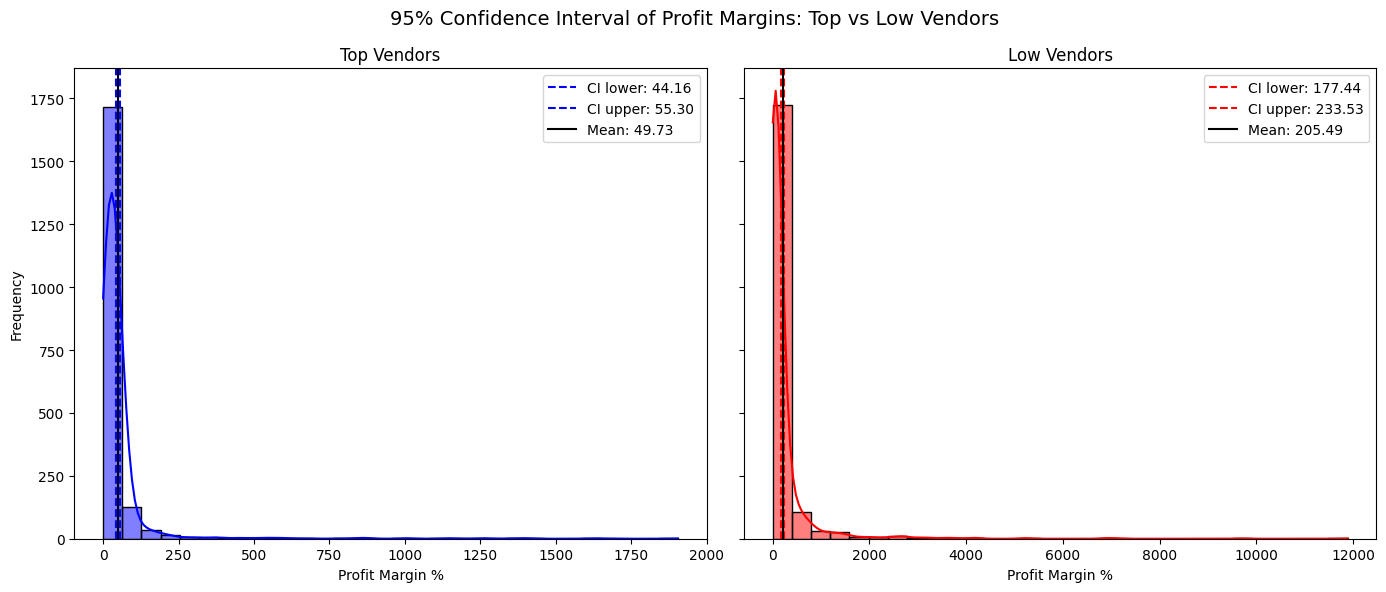

In [45]:
top_mean,top_lower,top_upper=confidence_interval(top_vendors['ProfitMargin'])
low_mean,low_lower,low_upper=confidence_interval(low_vendors['ProfitMargin'])
print(f'Top vendors 95% CI:({top_lower:.2f},{top_upper:.2f}),Mean:{top_mean:.2f}')
print(f'Low vendors 95% CI:({low_lower:.2f},{low_upper:.2f}),Mean:{low_mean:.2f}')
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# ---------- Top Vendors ----------
sns.histplot(top_vendors['ProfitMargin'], kde=True, bins=30, color='blue', alpha=0.5, ax=axes[0])
axes[0].axvline(top_lower, color='blue', linestyle='--', label=f'CI lower: {top_lower:.2f}')
axes[0].axvline(top_upper, color='blue', linestyle='--', label=f'CI upper: {top_upper:.2f}')
axes[0].axvline(top_mean,  color='black', linestyle='-', label=f'Mean: {top_mean:.2f}')
axes[0].set_title("Top Vendors")
axes[0].set_xlabel("Profit Margin %")
axes[0].set_ylabel("Frequency")
axes[0].legend()

# ---------- Low Vendors ----------
sns.histplot(low_vendors['ProfitMargin'], kde=True, bins=30, color='red', alpha=0.5, ax=axes[1])
axes[1].axvline(low_lower, color='red', linestyle='--', label=f'CI lower: {low_lower:.2f}')
axes[1].axvline(low_upper, color='red', linestyle='--', label=f'CI upper: {low_upper:.2f}')
axes[1].axvline(low_mean,  color='black', linestyle='-', label=f'Mean: {low_mean:.2f}')
axes[1].set_title("Low Vendors")
axes[1].set_xlabel("Profit Margin %")
axes[1].legend()

plt.suptitle("95% Confidence Interval of Profit Margins: Top vs Low Vendors", fontsize=14)
plt.tight_layout()
plt.show()



In [46]:
top_vendors['ProfitMargin'].describe().T

count    1930.000000
mean       49.729226
std       124.688913
min         0.080503
25%        15.589959
50%        30.184856
75%        45.774523
max      1905.024631
Name: ProfitMargin, dtype: float64

In [47]:
low_vendors['ProfitMargin'].describe().T

count    1.930000e+03
mean     2.054859e+02
std      6.281982e+02
min      1.367480e-14
25%      3.176393e+01
50%      5.049587e+01
75%      1.320238e+02
max      1.189155e+04
Name: ProfitMargin, dtype: float64

# Is there a significant difference in the profit margins between top performing and low performing vendors? 
<span style="font-size:90%">Hypothesis:</span>  
- <span style="font-size:90%">H0(Null Hypothesis):There is no significant difference in the mean profit margins of top performing and low performing vendors</span>  
- <span style="font-size:90%">H1(Alternative Hypothesis):There is a significant difference in the mean profit margins of top performing and low performing vendors</span>



In [54]:
from scipy.stats import ttest_ind
top_threshold=df['TotalEarned'].quantile(0.75)
low_threshold=df['TotalEarned'].quantile(0.25)   
top_vendors=df[df['TotalEarned']>=top_threshold].dropna()
low_vendors=df[df['TotalEarned']<=low_threshold].dropna()

# Perform two sample T-tests
t_stat, p_value = ttest_ind(top_vendors['ProfitMargin'],low_vendors['ProfitMargin'],equal_var=False)

# Print results 
                          
print(f'T-statistics: {t_stat:.4f},P-value {p_value:.4f}')
if p_value<0.05:
    print('Reject H0: There is a significant diffrence between the profit margins between top performing and low performing vendors')
else: 
   
    print('Fail to reject H0: There is no significant diffrence between the profit margins between top performing and low performing vendors')

T-statistics: -10.6841,P-value 0.0000
Reject H0: There is a significant diffrence between the profit margins between top performing and low performing vendors
